In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
dados = pd.read_csv(os.path.join("dados.csv"))
display(dados)

,nome,sexo,pontos
0,ABNER YZUMI MACIEL DE ALMEIDA,M,75
1,ADALBERTO DE SOUZA PINHEIRO,M,70
2,ALESSANDRO NUNES,M,80
3,ALESSON SANTOS DE SOUZA,M,90
4,ALINE RICARDO DA COSTA,F,50
...,...,...,...
58,THIAGO ANDRADE DOS SANTOS,M,75
59,VICTOR ALVES DO NASCIMENTO,M,50
60,WILLIAM PEREIRA SANTOS,M,70
61,WILLIAM TAKAO OMATSU,M,90


Text(0.5, 1.0, 'Media Homens x Mulheres')

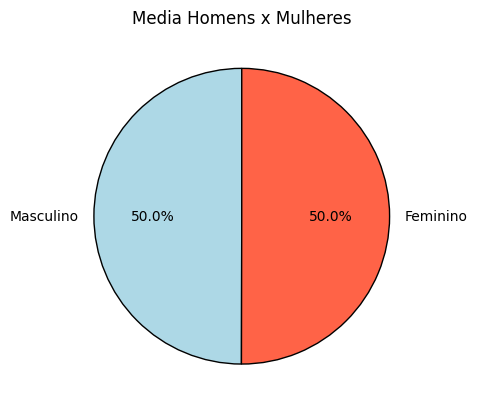

In [4]:
media_m = dados.loc[dados['sexo'] == 'M', 'pontos'].mean()
media_f = dados.loc[dados['sexo'] == 'F', 'pontos'].mean()
valores = [media_m, media_f]

plt.pie(valores, startangle=90, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, labels=("Masculino", "Feminino"), colors=["lightblue","tomato"])
plt.title("Media Homens x Mulheres")

In [5]:
pontos_m = dados.loc[dados['sexo'] == 'M', 'pontos']
pontos_f = dados.loc[dados['sexo'] == 'F', 'pontos']

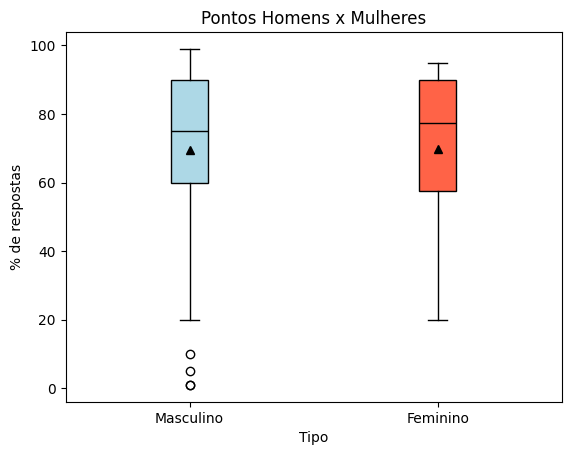

In [6]:
data = [pontos_m, pontos_f]
labels = ("Masculino", "Feminino")
box_colors = ["lightblue", "tomato"]

boxplot = plt.boxplot(data, labels=labels, showmeans=True, patch_artist=True)

for box, color in zip(boxplot['boxes'], box_colors):
    box.set_facecolor(color)

for median in boxplot['medians']:
    median.set_color('black')
for mean_arrow in boxplot['means']:
    mean_arrow.set_markerfacecolor('black')
    mean_arrow.set_markeredgecolor('black')

plt.ylabel("% de respostas")
plt.xlabel("Tipo")
plt.title("Pontos Homens x Mulheres")
plt.show()

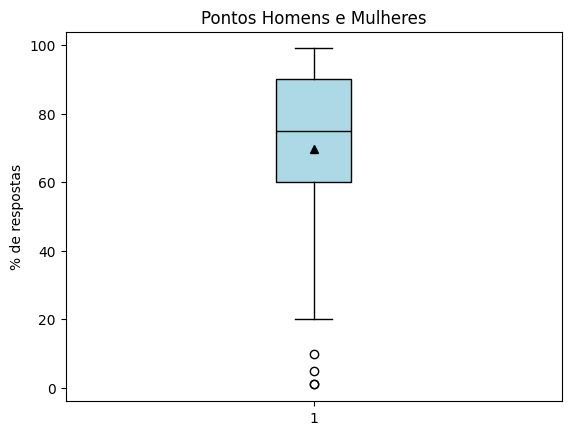

In [7]:
data = dados["pontos"]

boxplot = plt.boxplot(data, showmeans=True, patch_artist=True)

for box, color in zip(boxplot['boxes'], box_colors):
    box.set_facecolor(color)

for median in boxplot['medians']:
    median.set_color('black')
for mean_arrow in boxplot['means']:
    mean_arrow.set_markerfacecolor('black')
    mean_arrow.set_markeredgecolor('black')

plt.ylabel("% de respostas")
plt.title("Pontos Homens e Mulheres")
plt.show()

In [15]:
colunas = ["pontos"]

for i in colunas:
    quartis = dados[i].quantile([0.25, 0.5, 0.75], interpolation='linear')
    interquartil = quartis[0.75] - quartis[0.25]
    lim_min = quartis[0.25] - interquartil*1.5
    lim_max = quartis[0.75] + interquartil*1.5

    out_inf = dados.loc[dados[i] <= lim_min]
    print(f'Outlier inferior')
    display(out_inf[["nome", i]])

    out_sup = dados.loc[dados[i] >= lim_max]
    print(f'\nOutlier superior')
    display(out_sup[["nome", i]])

    notas_perfeitas = dados.loc[dados[i] >= 95].sort_values(by='pontos', ascending=True)
    print(f"Notas perfeitas")
    display(notas_perfeitas)

Outlier inferior


,nome,pontos
21,GABRIEL MARTINS DOS SANTOS,5
31,JOSE WILLIAM DA SILVA,1
37,LUCIANO DA SILVA SOUSA,1
52,ROBERTO CERIANI MARINO,10



Outlier superior


,nome,pontos


Notas perfeitas


,nome,sexo,pontos
5,ANA CAROLINA VALLIM FACANHA,F,95
10,DIEGO FERREIRA DA MATA,M,95
16,FERNANDA GALVAO DOS SANTOS,F,95
46,MICHAEL FRAMARIN MORAES,M,95
48,PEDRO BITTAR KALIL,M,95
18,FILIPE EMANUEL DE LIMA,M,99
26,HENRIQUE MERCADO SILVA,M,99
34,LEANDRO SANTOS GIOMETTI,M,99
40,MARCOS VINICIUS SILVA CARIOLANO,M,99
43,MATHEUS AUGUSTO BRAVO MONTEIRO,M,99


In [ ]:
filtered_df = dados.drop_duplicates(subset='pontos', keep='first')
filtered_df = filtered_df.sort_values(by='pontos', ascending=True)
display(filtered_df)

,nome,sexo,pontos
31,JOSE WILLIAM DA SILVA,M,1
21,GABRIEL MARTINS DOS SANTOS,M,5
52,ROBERTO CERIANI MARINO,M,10
8,CAMILA PEREIRA DO CARMO MOURA,F,20
51,ROBERTA MATIAS MARTINS,F,25
24,GUILHERME MARCONATO MARTONI,M,30
39,LUIZ FELIPE MOURA DOS SANTOS,M,40
4,ALINE RICARDO DA COSTA,F,50
6,ANA PAULA ABIGAIL SCHENKEL GAMARRA,F,60
1,ADALBERTO DE SOUZA PINHEIRO,M,70


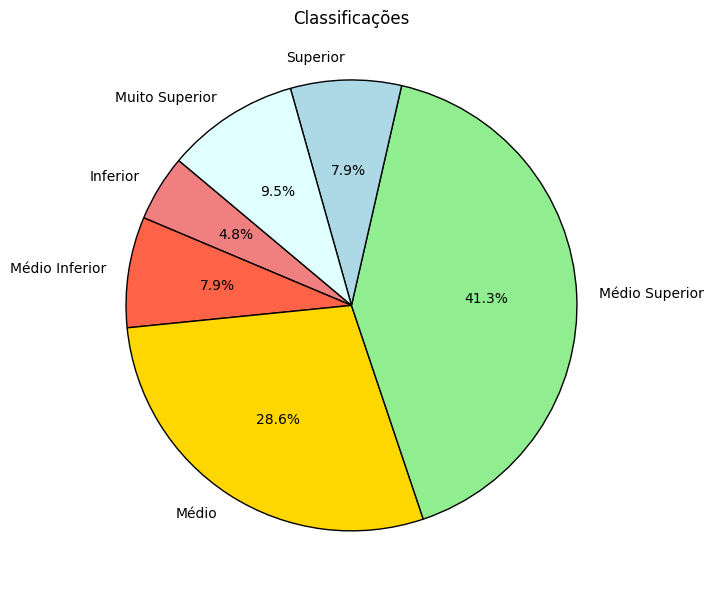

In [ ]:
inferior = [1,5]
medio_inferior = [10, 20, 25]
medio = [30, 40, 50, 60, 70]
medio_superior = [75, 80, 90]
superior = [95]
muito_superior = [99]

data = dados["pontos"]
score_ranges = {
    'Inferior': [1, 5],
    'Médio Inferior': [10, 20, 25],
    'Médio': [30, 40, 50, 60, 70],
    'Médio Superior': [75, 80, 90],
    'Superior': [95],
    'Muito Superior': [99]
}

percentage_by_range = {}

total_count = len(data)

for range_name, score_range in score_ranges.items():
    is_in_range = dados['pontos'].between(score_range[0], score_range[-1])
    count_in_range = sum(is_in_range)
    percentage = (count_in_range / total_count) * 100
    percentage_by_range[range_name] = percentage

inferior_percentage = percentage_by_range['Inferior']
medio_inferior_percentage = percentage_by_range['Médio Inferior']
medio_percentage = percentage_by_range['Médio']
medio_superior_percentage = percentage_by_range['Médio Superior']
superior_percentage = percentage_by_range['Superior']
muito_superior_percentage = percentage_by_range['Muito Superior']

labels = ['Inferior', 'Médio Inferior', 'Médio', 'Médio Superior', 'Superior', 'Muito Superior']
sizes = [inferior_percentage, medio_inferior_percentage, medio_percentage, medio_superior_percentage, superior_percentage, muito_superior_percentage]
colors = ['lightcoral', 'tomato', 'gold', 'lightgreen', 'lightblue', 'lightcyan']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.axis('equal')
plt.subplots_adjust(top=1.25)
plt.title("Classificações")

plt.show()